In [20]:
import numpy as np
import cv2

# Q2
Read `LineDetection.jpg` (the image below)




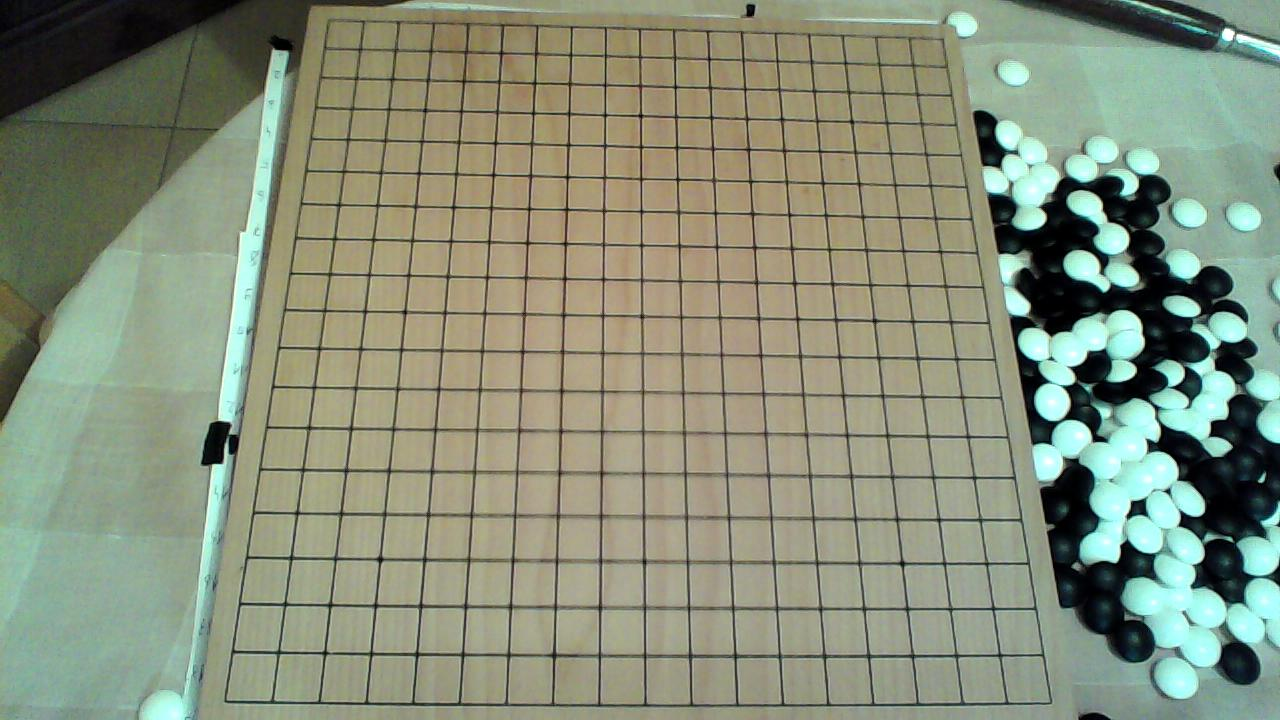

Use Hough to detect lines.

Note that you should consider the `Threshold`!

Here the threshold is `250`


True

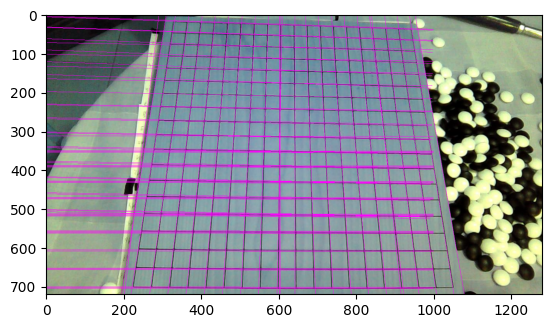

In [4]:
#https://www.geeksforgeeks.org/line-detection-python-opencv-houghline-method/#:~:text=The%20Hough%20Transform%20is%20a,or%20distorted%20a%20little%20bit.
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('LineDetection.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLines(edges, 1, np.pi/180, 250)
 
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*r
    y0 = b*r
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 255), 1)
plt.imshow(img)
cv2.imwrite('linesDetected.jpg', img)

Here is a sample output:

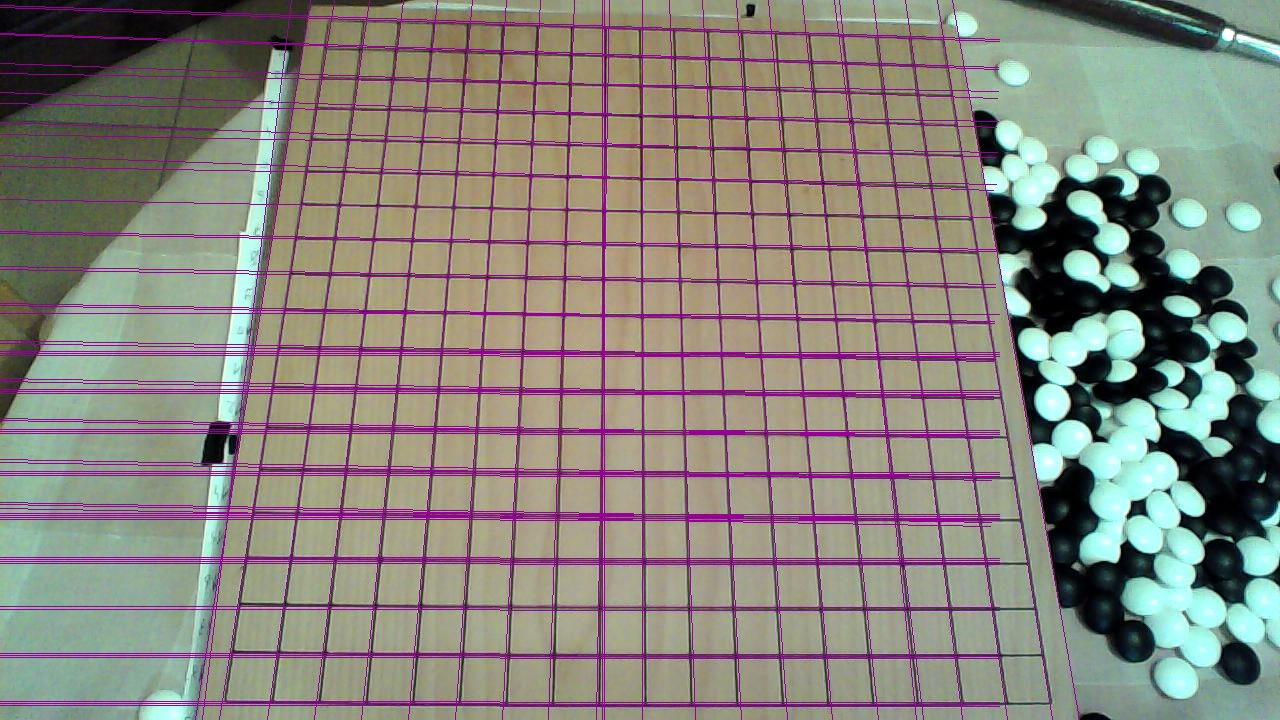

Now use *Probabilistic Hough Transform*. then, apply it to this picture.

True

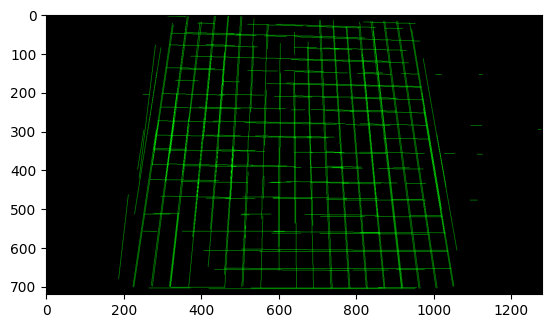

In [98]:
#TODO

import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('LineDetection.jpg')
blank_image = np.zeros((image.shape[0],image.shape[1],3), np.uint8)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,150,apertureSize=3)
 
lines_list =[]
lines = cv2.HoughLinesP(edges, 1, np.pi/360,threshold=140,minLineLength=5, maxLineGap=15)
 
for points in lines:
    x1,y1,x2,y2=points[0]
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)
    cv2.line(blank_image,(x1,y1),(x2,y2),(0,255,0),1)
    lines_list.append([(x1,y1),(x2,y2)])
     
plt.imshow(blank_image)
cv2.imwrite('linesDetected_Probabilistic.jpg', image)

Here is a sample output (Not the best one): 

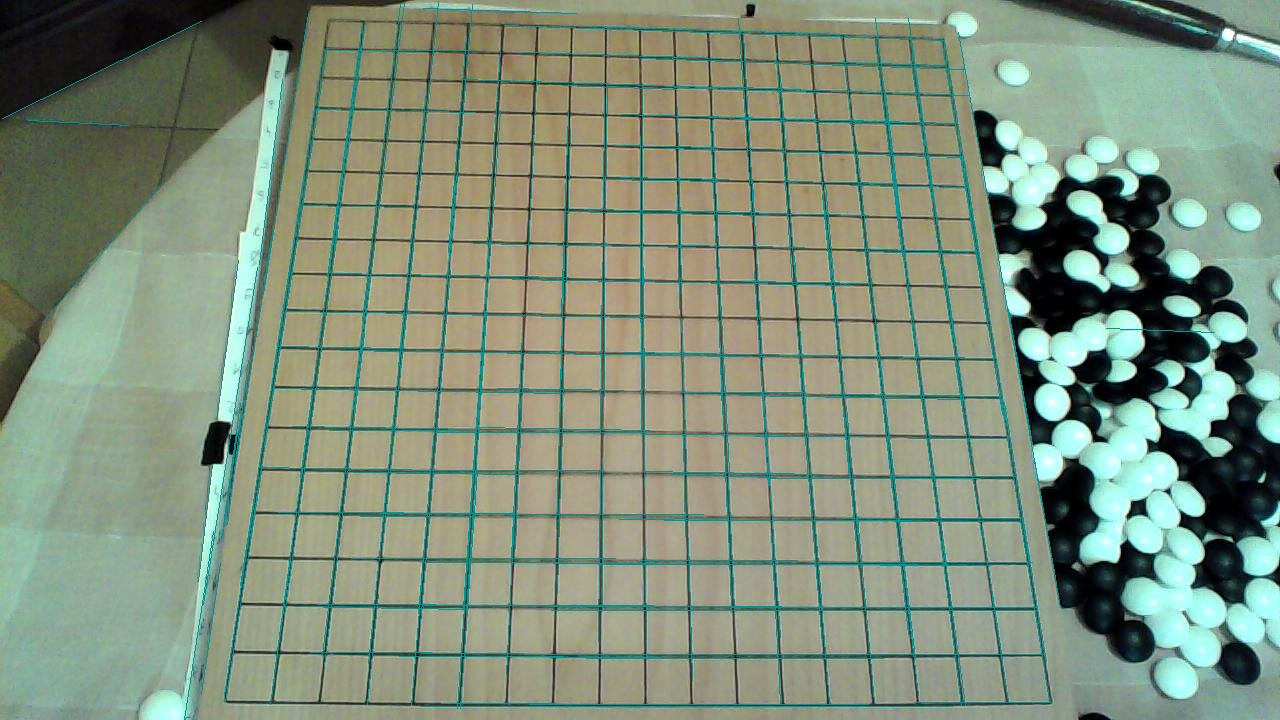

Note that you should find the optimum amount of parameters which are used in this algorithm.

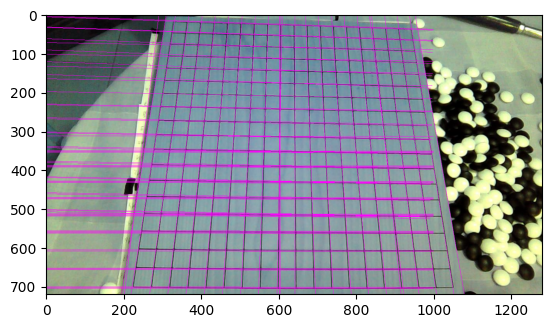

In [5]:
plt.imshow(img)

# Q3

What does this cell of code do? Explain the algorithm.

Then Compare it with the results of the previous part.

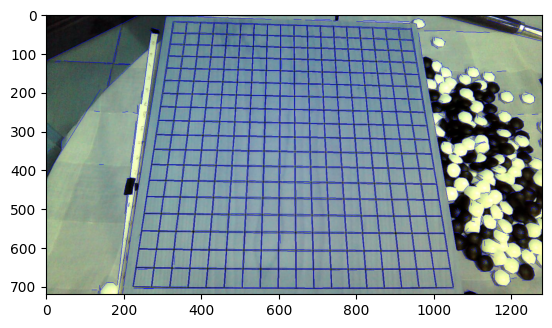

In [8]:
img = cv2.imread("LineDetection.jpg",0)
imgcolorous = cv2.imread('LineDetection.jpg')
UNKNOWN = cv2.createLineSegmentDetector(0)
lines = UNKNOWN.detect(img)[0]
drawn_img = UNKNOWN.drawSegments(imgcolorous,lines)
plt.imshow(drawn_img)

# Q4

In the cells below you should define two functions that one of them covert RGB to CMYK and another one Convert them vice versa. 

In [2]:
def rgb_to_cmyk(r, g, b, RGB_SCALE = 255, CMYK_SCALE = 100):

  #TODO
  if (r, g, b) == (0, 0, 0):
        return 0, 0, 0, CMYK_SCALE

  c = 1 - r / RGB_SCALE
  m = 1 - g / RGB_SCALE
  y = 1 - b / RGB_SCALE

  min_cmy = min(c, m, y)
  c = (c - min_cmy) / (1 - min_cmy)
  m = (m - min_cmy) / (1 - min_cmy)
  y = (y - min_cmy) / (1 - min_cmy)
  k = min_cmy

  c = c * CMYK_SCALE
  m = m * CMYK_SCALE
  y = y * CMYK_SCALE
  k = k * CMYK_SCALE
  return c, m, y, k

In [3]:
rgb_to_cmyk(25, 56, 25)

(55.35714285714286, 0.0, 55.35714285714286, 78.03921568627452)

Expected Output: (55, 0, 55, 78)

In [4]:
def cmyk_to_rgb(c, m, y, k, CMYK_SCALE = 100, RGB_SCALE = 255):

  #TODO
  r = RGB_SCALE * (1.0 - c / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))
  g = RGB_SCALE * (1.0 - m / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))
  b = RGB_SCALE * (1.0 - y / float(CMYK_SCALE)) * (1.0 - k / float(CMYK_SCALE))

  return r, g, b

In [5]:
cmyk_to_rgb(55, 0, 55, 78)

(25.244999999999994, 56.099999999999994, 25.244999999999994)

Expected Output: (25, 56, 25)

# Q5
Compute the HSI parametes and V, L and Y according to lectures.

In [14]:
#TODO 
import numpy as np
def HSI(r,g,b):
    theta = np.arccos(((r-g)+(r-b))/(2*np.sqrt(((r-g)**2)+(r-b)*(g-b))))
    if b<=g:
        H = theta
    else:
        H = 360 - theta
    S = 1 - 3*((min(r,g,b))/(r+g+b))
    I = (r+g+b)/3
    print("H:{}, S:{}, I:{}".format(H,S,I))
    
def HSV(r,g,b):
    V = max(r,g,b)
    L = (max(r,g,b)+min(r,g,b))/2
    print("V:{}, L:{}".format(V,L))
def ycbcr(r,g,b):
    y = 16 + (((r<<6)+(r<<1)+(g<<7)+g+(b<<4)+(b<<3)+b)>>8)
    Cb = 128+((-((r<<5)+(r<<2)+(r<<1))-((g<<6)+(g<<3)+(g<<1))+((b<<7)-(b<<4)))>>8)
    Cr = 128+(((r<<7)-(r<<4)-((g<<6)+(g<<5)-(g<<1))-((b<<4)+(b<<1)))>>8)
    print("y:{}, Cb:{}, Cr:{}".format(y,Cb,Cr))

(r,g,b) = (150, 65, 200) 
HSI(r,g,b)
HSV(r,g,b)
ycbcr(r,g,b)


H:358.5777839762459, S:0.5301204819277108, I:138.33333333333334
V:200, L:132.5
y:106, Cb:174, Cr:155


# Good Luck!